<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Lab: Titanic EDA

---
For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

1. Read the titanic data (in the form of the `train.csv` in this repo using the appropriate Pandas method).

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('train.csv')

In [4]:
# look inside the data
# df.info()
# df.describe()
# df.shape
# df.dtypes

### Data Dictionary

| Variable | Description | Details |
|----------|-------------|---------|
| survival | Survival | 0 = No; 1 = Yes |
| pclass | Passenger Class | 1 = 1st; 2 = 2nd; 3 = 3rd |
| name | First and Last Name | |
| sex | Sex | |
| age | Age | |
| sibsp | Number of Siblings/Spouses Aboard | |
| parch | Number of Parents/Children Aboard | |
| ticket | Ticket Number | |
| fare | Passenger Fare | |
| cabin | Cabin | |
| embarked | Port of Embarkation | C = Cherbourg; Q = Queenstown; S = Southampton |

## Step 2: Cleaning the data
####  1. Create a bar chart showing how many missing values are in each column

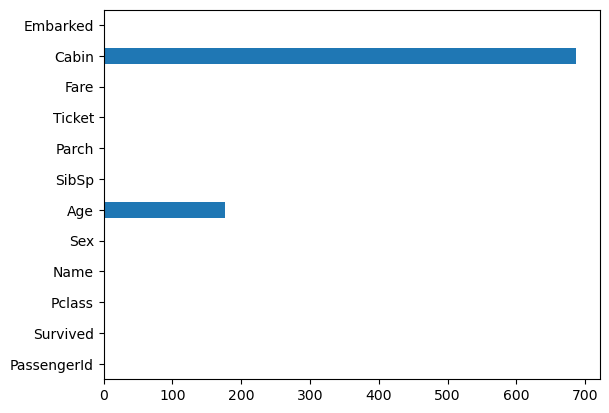

In [7]:
df.isnull().sum().plot(kind='barh');

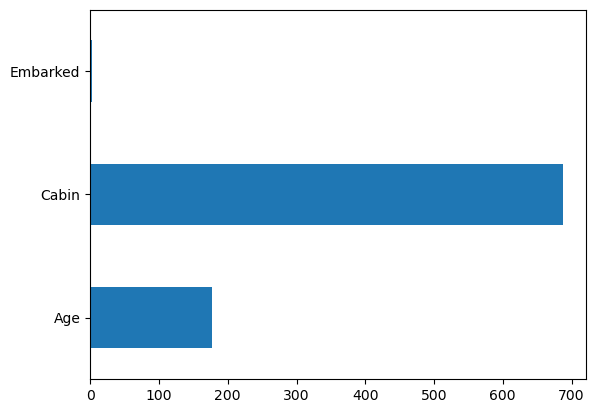

In [8]:
# why not each column?
# I find it cleaner
df.isnull().sum()[df.isnull().sum() != 0].plot(kind='barh');

<Axes: >

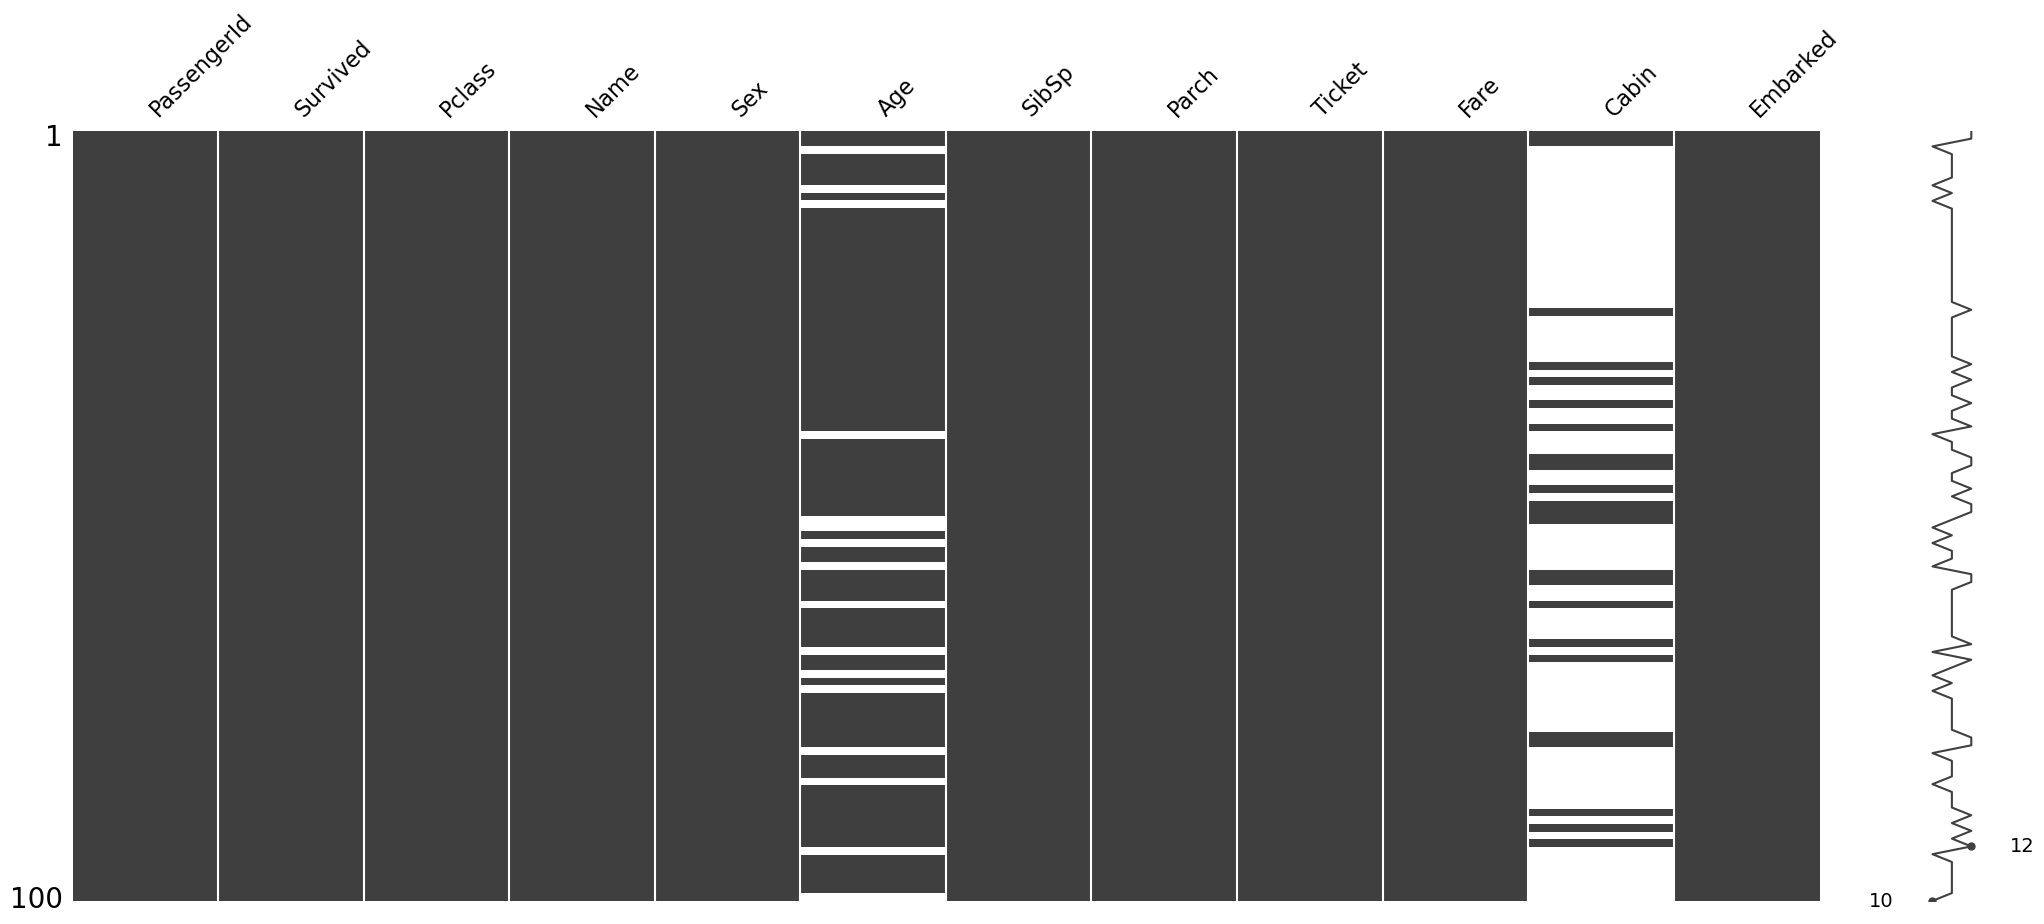

In [9]:
#!pip install missingno
import missingno as msno

msno.matrix(df.sample(100))

####  2. Which column has the most `NaN` values? How many cells in that column are empty?


In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [13]:
# Column Cabin has most NaN values, 687 of cell are missing

####  3. Delete all rows where `Embarked` is empty

In [15]:
# review row with missing Embarked
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
# delete row with Embarked is null
df = df[~df['Embarked'].isnull()]

In [17]:
# review deleted row with missing Embarked
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [19]:
# replace Cabin with NaN or empty to ¯\(ツ)/¯
df['Cabin'] = df['Cabin'].replace(np.nan, r'¯\(ツ)/¯')

In [20]:
# review replaced Cabin value
df[df['Cabin'] == r'¯\(ツ)/¯'].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,¯\(ツ)/¯,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,¯\(ツ)/¯,S


In [21]:
# check for NaN or empty in column Cabin
df['Cabin'].isnull().sum()

0

## Step 3: Feature extraction

#### 1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [24]:
# sum number family member of SibSp and Parch
df['FamilyCount'] = df['SibSp'] + df['Parch']

In [25]:
# review value of new column FamilyCount
#df.head(2)
df[['SibSp','Parch','FamilyCount']]

,SibSp,Parch,FamilyCount
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,1,2,3
889,0,0,0


#### 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.


In [27]:
# set value 1 to column Name with 'Rev.' in it if not 0
df['IsReverend'] = np.where(df['Name'].str.contains('Rev.'), 1, 0)

In [28]:
# review value of new column IsReverend
df[df['IsReverend'] == 1].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0,1


#### 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`.

  - Familiarize yourself with the [**`pd.get_dummies` documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS (required): Extract the title from everyone's name and create dummy columns

In [48]:
# mapping category for Embarked and Sex

# create dummy for Embarked
emb_df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
# create dummy for Sex
sex_df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')
df['Title'] = df["Name"].str.extract(r'(\w+\.)')
# Embarked Title
title_df = pd.get_dummies(df, columns=['Title'])

# not merge to keep df clean
#df = pd.concat([df,emb_df,sex_df])
#df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3556 entries, 0 to 890
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      3556 non-null   int64  
 1   Survived         3556 non-null   int64  
 2   Pclass           3556 non-null   int64  
 3   Name             3556 non-null   object 
 4   Sex              2667 non-null   object 
 5   Age              2848 non-null   float64
 6   SibSp            3556 non-null   int64  
 7   Parch            3556 non-null   int64  
 8   Ticket           3556 non-null   object 
 9   Fare             3556 non-null   float64
 10  Cabin            3556 non-null   object 
 11  Embarked         2667 non-null   object 
 12  FamilyCount      3556 non-null   int64  
 13  IsReverend       3556 non-null   int32  
 14  Title            889 non-null    object 
 15  Embarked_C       889 non-null    object 
 16  Embarked_Q       889 non-null    object 
 17  Embarked_S       889

In [27]:
# review value of new columns 
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0


## Step 4: Exploratory analysis

_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

#### 1. What was the survival rate overall?


In [31]:
total = df.shape[0]
survivor = df[df['Survived'] == 1].shape[0]
rate = survivor/total*100

print(f"Overall survival rate: {rate:.2f}%")

Overall survival rate: 38.25%


#### 2. Which gender fared the worst? What was their survival rate?

In [33]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FamilyCount      int64
IsReverend       int32
dtype: object

In [34]:
gender_survivor_rate = df.groupby('Sex')['Survived'].mean() * 100

print(f"Gender that fared the worst:\n{gender_survivor_rate}")

Gender that fared the worst:
Sex
female    74.038462
male      18.890815
Name: Survived, dtype: float64


#### 3. What was the survival rate for each `Pclass`?

In [36]:
survival_rate = df.groupby('Pclass')['Survived'].mean() * 100

print(f"Survival rate for each Pclass:\n{survival_rate}")

Survival rate for each Pclass:
Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64


#### 4. Did any reverends survive? How many?`

In [38]:
survivor_rev = df[(df['IsReverend'] == 1) & (df['Survived'] == 1)].shape[0]

print(f"Number of survivor reverend: {survivor_rev}")

Number of survivor reverend: 0


#### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [40]:
total = df.shape[0]
survivor = df[df['Cabin'] == r'¯\(ツ)/¯'].shape[0]

survivor_rate = survivor / total * 100
print(f"Survival rate for cabin marked {r'¯\(ツ)/¯'}:  {survivor_rate:.2f}%")

Survival rate for cabin marked ¯\(ツ)/¯:  77.28%


#### 6. What is the survival rate for people whose `Age` is empty?

In [42]:
total = df.shape[0]
survivor = df[df['Age'].isnull()].shape[0]

survivor_rate = survivor / total * 100
print(f"Survival rate for people whose is empty: {survivor_rate:.2f}%")

Survival rate for people whose is empty: 19.91%


####  7. What is the survival rate for each port of embarkation?

In [44]:
survival_rate = df.groupby('Embarked')['Survived'].mean() * 100

print(f"Survival rate for each port:\n{survival_rate}")

Survival rate for each port:
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


#### 8. What is the survival rate for children (under 12) in each `Pclass`?

In [46]:
total = df.shape[0]
survivor = df[df['Age'] < 12].shape[0]

survivor_rate = survivor / total * 100
print(f"Survival rate for children (under 12): {survivor_rate:.2f}%")

Survival rate for children (under 12): 7.65%


####  9. Did the captain of the ship survive? Is he on the list?

In [109]:
# query captain data
captain_data = df[(df['Name'].str.contains('Smith')) & (df['Name'].str.contains('Edward'))]
captain_data.shape[0]
# 0 -- no, he is not on the list

0

#### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [146]:
pass_passenger = df[df["Survived"] == 0]
name = pass_passenger.sort_values('Fare', ascending=False)['Name'].head(1)
print('Who had most expensive that died', name.values[0])

Who had ost expensive that died Fortune, Mr. Charles Alexander


#### 11. Does having family on the boat help or hurt your chances of survival?

In [160]:
survival_rates_family_count = df.groupby("FamilyCount")["Survived"].mean() * 100
print('Survival rates family Count:', survival_rates_family_count)

Survival rates family Count: FamilyCount
0     30.093458
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64


## Step 5: Plotting
Using Matplotlib and Seaborn, create multiple charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [176]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Axes: xlabel='Pclass', ylabel='Fare'>

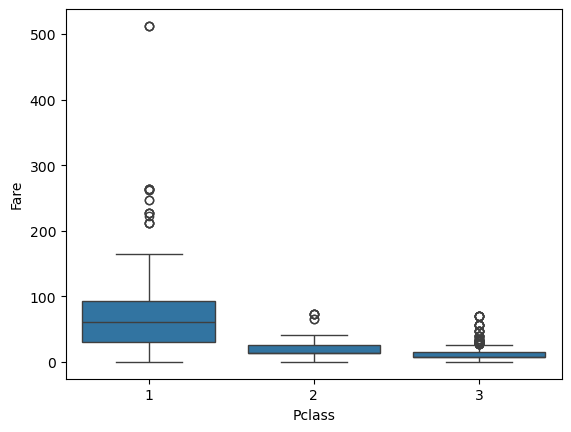

In [184]:
sns.boxplot(x='Pclass', y='Fare', data=df)

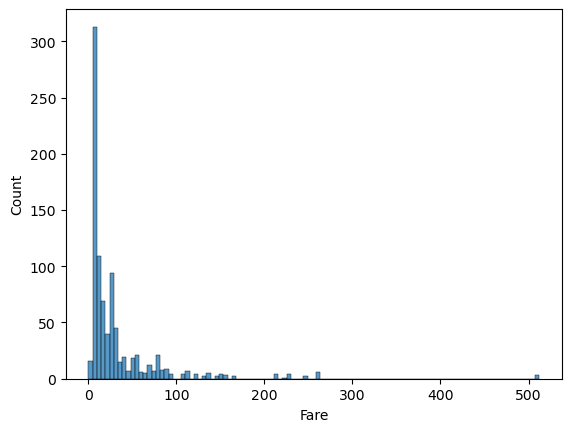

In [192]:
sns.histplot(df['Fare'], kde=False);

C:\dev\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


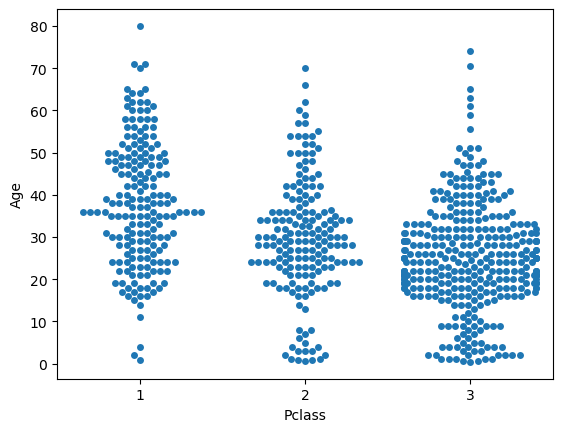

In [204]:
sns.swarmplot(x='Pclass', y='Age', data=df);

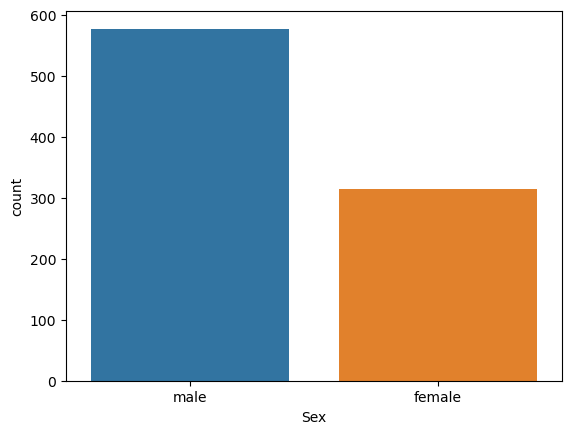

In [210]:
sns.countplot(x='Sex', data=df, hue='Sex');

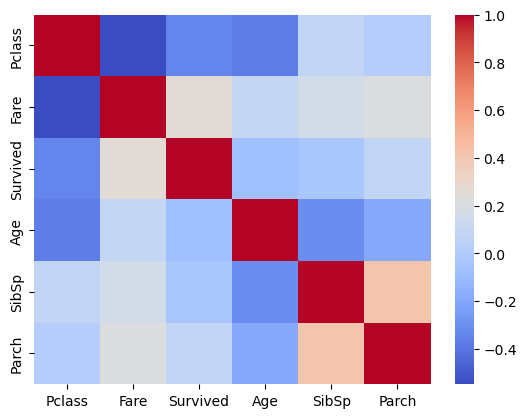

In [232]:
df_corr = df[['Pclass', 'Fare', 'Survived', 'Age', 'SibSp', 'Parch']].corr()
sns.heatmap(df_corr, cmap='coolwarm');